# Importing necessary headers

In [46]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob

# Camera Calibration
# 1. Compute camera matrix and distortion coefficients to calibrate camera

In [47]:
# function to calibrate the camera
def calibrate_camera(gray, obj_points, img_points):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
    return ret, mtx, dist, rvecs, tvecs

# function that returns an image after distortion correction
def correct_for_distortion(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

# function to warp an image
#def warped_image(img, nx, ny, mtx, dist):

In [48]:
# specifying number of corners in an image
nx = 9 # number of corners in the x direction
ny = 6 # number of corners in the y direction

# read the test image using cv2.read() method
img = cv2.imread("camera_cal/calibration2.jpg") 

# reading in all the images and iterate through them then use glob
# images = glob.glob("camera_cal/calibration*.jpg")

# prepare object points and image points for camera calibration
obj_points = [] # these are the 3D points in the real world
img_points = [] # these are the 2D points in the image plane/world

obj_p = np.zeros((6*9,3),np.float32)
obj_p[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# convert image to gray scale using cv2.cvtColor() method
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# locate the chessboard corners using cv2.findChessboardCorners()
ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)

print(ret)
# if corners are found then ret would be True, then add the points to img_points
if ret==True:
    img_points.append(corners)
    obj_points.append(obj_p)
    # draw the corners and display
    #img_cor = cv2.drawChessboardCorners(img,(9,6),corners,ret)
    #plt.imshow(img_cor)    

# Now everything is ready and we can use the cv2.calibrateCamera() function to find the distortion coefficients
ret, mtx, dist, rvecs, tvecs = calibrate_camera(gray, obj_points, img_points)

# correct for distortion
undist = correct_for_distortion(img, mtx, dist) # using distortion coeff to undistort the image
gray_undist = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)

True


# Visualizing the camera calibration result

In [49]:
# function to plot 2 images for comparison
def subplot_121_122(img1,title1,img2,title2): 
    %matplotlib inline
    f = plt.figure(figsize=(15,10))
    ax = f.add_subplot(121)
    ax.imshow(img1,cmap="gray")
    ax.set_title(title1)
    ax2 = f.add_subplot(122)
    ax2.imshow(img2,cmap="gray")
    ax2.set_title(title2)

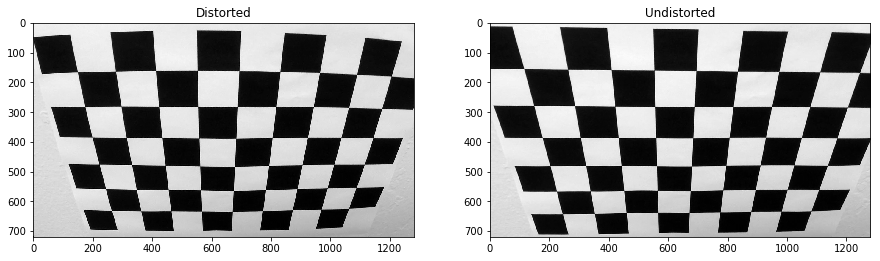

In [50]:
subplot_121_122(gray,"Distorted",gray_undist,"Undistorted")
#plt.savefig("output_images/Camera_Calibration.jpg",bbox="tight")

# Testing test Images after calibrating the camera

In [51]:
#test_images = glob.glob("test_images/test*.jpg")
test_image1 = mpimg.imread("test_images/test1.jpg")
test_image2 = mpimg.imread("test_images/test2.jpg")
test_image3 = mpimg.imread("test_images/test3.jpg")
test_image4 = mpimg.imread("test_images/test4.jpg")
test_image5 = mpimg.imread("test_images/test5.jpg")
test_image6 = mpimg.imread("test_images/test6.jpg")
str8_lines_1 = mpimg.imread("test_images/straight_lines1.jpg")
str8_lines_2 = mpimg.imread("test_images/straight_lines2.jpg")

In [52]:
undistorted_test_image1 = correct_for_distortion(test_image1, mtx, dist)
undistorted_test_image2 = correct_for_distortion(test_image2, mtx, dist)
undistorted_test_image3 = correct_for_distortion(test_image3, mtx, dist)
undistorted_test_image4 = correct_for_distortion(test_image4, mtx, dist)
undistorted_test_image5 = correct_for_distortion(test_image5, mtx, dist)
undistorted_test_image6 = correct_for_distortion(test_image6, mtx, dist)
undistorted_str8_lines_1 = correct_for_distortion(str8_lines_1, mtx, dist)
undistorted_str8_lines_2 = correct_for_distortion(str8_lines_2, mtx, dist)

# Undistorted test image 1 

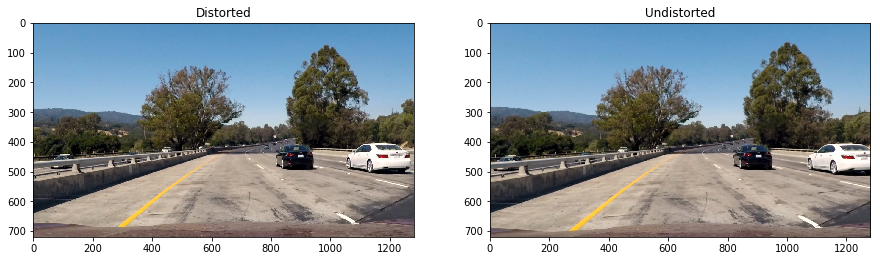

In [53]:
subplot_121_122(test_image1,"Distorted",undistorted_test_image1,"Undistorted")
#plt.savefig("output_images/Camera_Calibration_test_image_1.jpg",bbox="tight")

# Undistorted test image 2 

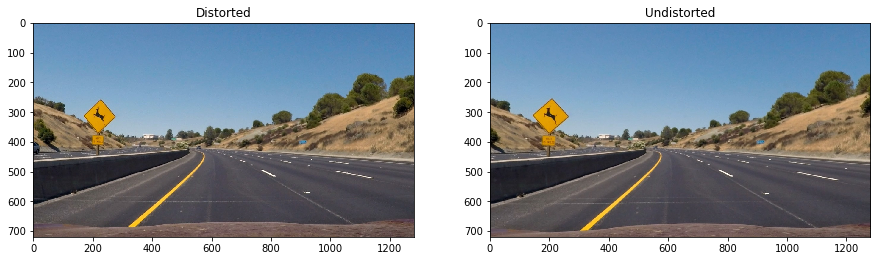

In [54]:
subplot_121_122(test_image2,"Distorted",undistorted_test_image2,"Undistorted")
#plt.savefig("output_images/Camera_Calibration_test_image_2.jpg",bbox="tight")

# Undistorted test image 3

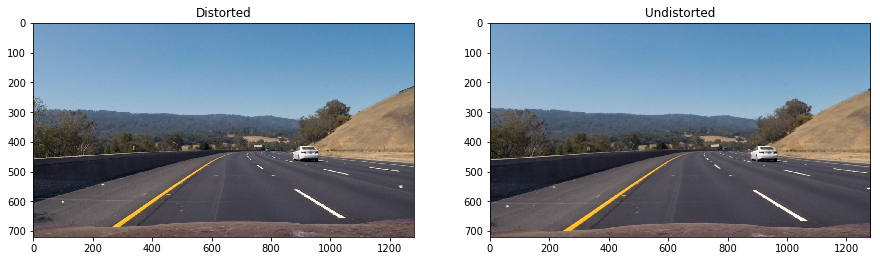

In [55]:
subplot_121_122(test_image3,"Distorted",undistorted_test_image3,"Undistorted")
#plt.savefig("output_images/Camera_Calibration_test_image_3.jpg",bbox="tight")

# Undistorted test image 4

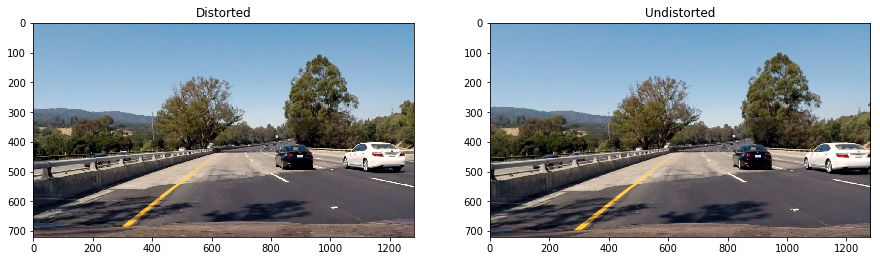

In [56]:
subplot_121_122(test_image4,"Distorted",undistorted_test_image4,"Undistorted")
#plt.savefig("output_images/Camera_Calibration_test_image_4.jpg",bbox="tight")

# Undistorted test image 5

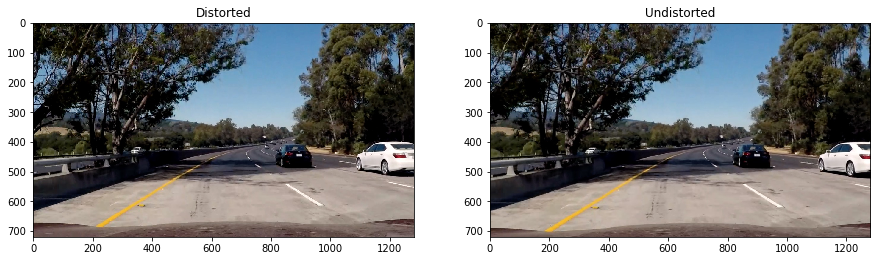

In [57]:
subplot_121_122(test_image5,"Distorted",undistorted_test_image5,"Undistorted")
#plt.savefig("output_images/Camera_Calibration_test_image_5.jpg",bbox="tight")

# Undistorted test image 6 

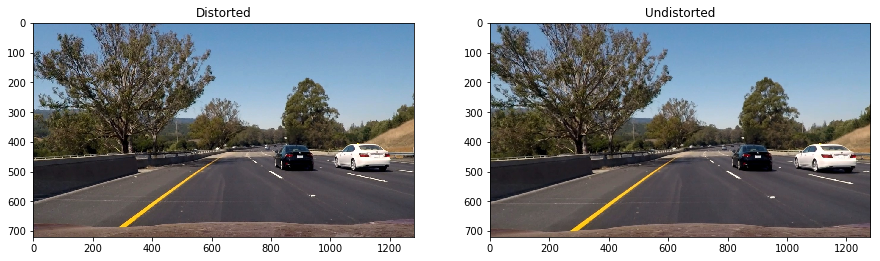

In [58]:
subplot_121_122(test_image6,"Distorted",undistorted_test_image6,"Undistorted")
#plt.savefig("output_images/Camera_Calibration_test_image_6.jpg",bbox="tight")

# Undistorted straight lines 1 

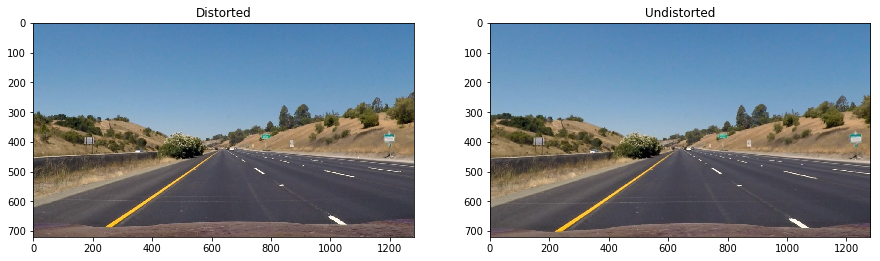

In [59]:
subplot_121_122(str8_lines_1,"Distorted",undistorted_str8_lines_1,"Undistorted")
#plt.savefig("output_images/Camera_Calibration_straight_lines_1.jpg",bbox="tight")

# Undistorted straight lines 2 

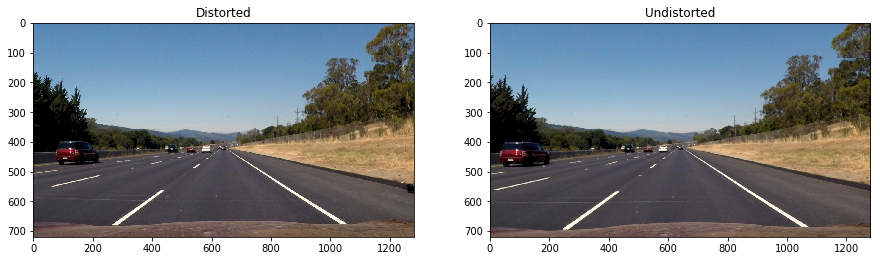

In [60]:
subplot_121_122(str8_lines_2,"Distorted",undistorted_str8_lines_2,"Undistorted")
#plt.savefig("output_images/Camera_Calibration_straight_lines_2.jpg",bbox="tight")

# Color transform and gradients
# 2. Use color transforms and gradients to create a thresholded binary image

In [196]:
def abs_sobel_thresh(i, orient='x', sobel_kernel=3, abs_thresh=(0,255)):
    # convert to a grayscale image
    gray_i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    # based on orient value compute sobelx or sobely followed by absolute value
    if orient=='x':
        sobelx = cv2.Sobel(gray_i,cv2.CV_64F,1,0,ksize=sobel_kernel)
        abs_sobel = np.absolute(sobelx)
    else:
        sobely = cv2.Sobel(gray_i,cv2.CV_64F,0,1,ksize=sobel_kernel)
        abs_sobel = np.absolute(sobely)
    # convert the absolute value to 8-bit
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # define a binary output
    binary_output = np.zeros_like(scaled_sobel)
    # applying the threshold
    binary_output[(scaled_sobel>=abs_thresh[0]) & (scaled_sobel<=abs_thresh[1])]=1
    # return binary output
    return binary_output
        
def mag_thresh(i, sobel_kernel = 3, magnitude_thresh=(0,255)):
    # convert to a grayscale image
    gray_i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    # compute sobelx and sobely
    sobelx = cv2.Sobel(gray_i,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray_i,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # compute the magnitude
    mag = np.sqrt(sobely*sobely + sobelx*sobelx)
    # scale to 8-bit and convert to type uint8
    scale_factor = np.max(mag)/255
    scaled_mag = (mag/scale_factor).astype(np.uint8)
    # define a binary output
    binary_output = np.zeros_like(gray_i)
    # apply the threshold
    binary_output[(scaled_mag>=magnitude_thresh[0]) & (scaled_mag<=magnitude_thresh[1])]=1
    # return the binary_output
    return binary_output

def direc_thresh(i, sobel_kernel = 3, dir_thresh=(0,np.pi/2)):
    # convert to a grayscale image
    gray_i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    # compute sobelx and sobely
    sobelx = cv2.Sobel(gray_i,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray_i,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # compute the direction of the gradient
    abs_grad_dir = np.arctan2(np.absolute(sobely),np.absolute(sobelx))
    # define a binary output
    binary_output = np.zeros_like(gray_i)
    # applying the threshold
    binary_output[(abs_grad_dir>=dir_thresh[0]) & (abs_grad_dir<=dir_thresh[1])]=1
    # return the binary output
    return binary_output

def S_thresh(i, s_thresh=(0,255)): 
    # convert image from RGB to HLS channel
    hls = cv2.cvtColor(i, cv2.COLOR_RGB2HLS)
    # separatre the S channel
    S = hls[:,:,2]
    # define a binary output
    binary_output = np.zeros_like(S)
    # applying the threshold
    #print(s_thresh)
    binary_output[(S > s_thresh[0]) & (S <= s_thresh[1])]=1
    # return the binary output
    return binary_output

def B_thresh(i, b_thresh=(155,255)): # LAB colorspace
    lab = cv2.cvtColor(i, cv2.COLOR_RGB2Lab)
    B = lab[:,:,2]
    binary_output = np.zeros_like(B)
    binary_output[(B > b_thresh[0]) & (B <= b_thresh[1])]=1
    return binary_output

def LUV_L_thresh(i, l_thresh=(225,255)): # LAB colorspace
    lab = cv2.cvtColor(i, cv2.COLOR_RGB2LUV)
    L = lab[:,:,0]
    binary_output = np.zeros_like(L)
    binary_output[(L > l_thresh[0]) & (L <= l_thresh[1])]=1
    return binary_output

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return img #masked_image

def comibned_threshold(abs_sobel_x, abs_sobel_y, m_thresh, d_thresh, hls_thresh, lab_thresh, luv_thresh):
    combine = np.zeros_like(m_thresh)
    combine[((abs_sobel_x==1)&(abs_sobel_y==1)) | ((m_thresh==1)&(d_thresh==1))]=1
    COMBINE_with_HLS_THRESH = np.zeros_like(combine)
    COMBINE_with_HLS_THRESH[(combine==1) | (hls_thresh==1) | (lab_thresh==1) | (luv_thresh==1)]=1
    # mask the region that must conatin the lane lines
    vertices = np.array([[(200,400),
                      (1150,400),
                      (1150,720),
                      (200,720)]], dtype=np.int32) 
    masked_image = region_of_interest(COMBINE_with_HLS_THRESH, vertices) # masked image obtained
    return masked_image#COMBINE_with_HLS_THRESH#

def get_thresholded_image(i):
    # choode a kernel size
    ksize = 3 # large odd number for smoother gradient measurements
    # obtain sobel x thresholded image
    abs_thresh_x = abs_sobel_thresh(i,orient='x',sobel_kernel=ksize, abs_thresh=(20,100))
    # obtain sobel y thresholded image
    abs_thresh_y = abs_sobel_thresh(i,orient='y',sobel_kernel=ksize, abs_thresh=(20,100))
    # obtain magnitude thresholded image
    magnitude_t = mag_thresh(i,sobel_kernel=ksize,magnitude_thresh=(20,100))
    # obtain directional thresholded image
    direction_t = direc_thresh(i, sobel_kernel=15,dir_thresh=(0.7,1.4))#(0,np.pi/2))
    # obtain S channel thresholded image after color trasnform to HLS type
    hls_s_thresh = S_thresh(i,s_thresh=(155,255))
    lab_b_thresh = B_thresh(i,b_thresh=(190,255))
    luv_l_thresh = LUV_L_thresh(i,l_thresh=(225,255))
    combined = comibned_threshold(abs_thresh_x, abs_thresh_y, magnitude_t, direction_t, hls_s_thresh, lab_b_thresh, \
                                  luv_l_thresh)
    return abs_thresh_x, abs_thresh_y, magnitude_t, direction_t, hls_s_thresh, lab_b_thresh, luv_l_thresh, combined

In [197]:
# function call to obtain all the thresholded images in one line
THRESH_ABS_X, THRESH_ABS_Y, THRESH_MAG,\
THRESH_DIR, THRESH_HLS_S, THRESH_LAB_B, THRESH_LUV_L, COMBINED = get_thresholded_image(test_image3)

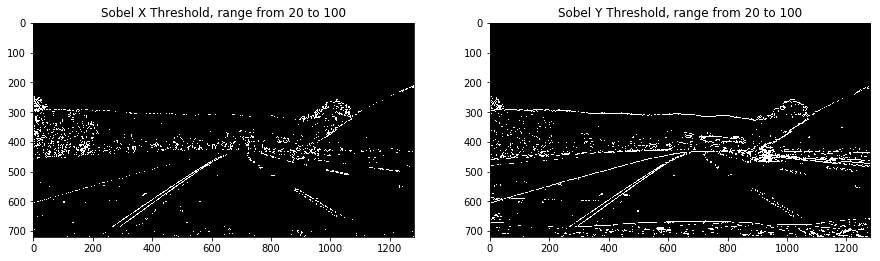

In [198]:
subplot_121_122(THRESH_ABS_X,"Sobel X Threshold, range from 20 to 100",THRESH_ABS_Y,"Sobel Y Threshold, range from 20 to 100")
#plt.savefig("output_images/Sobel_X_and_Y_test_image_3.jpg",bbox="tight")

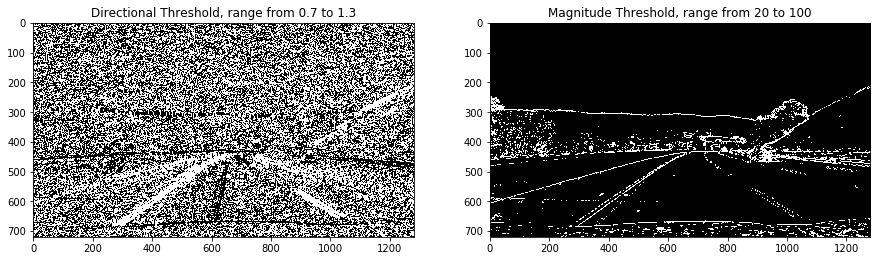

In [199]:
subplot_121_122(THRESH_DIR,"Directional Threshold, range from 0.7 to 1.3",THRESH_MAG,"Magnitude Threshold, range from 20 to 100")
#plt.savefig("output_images/Directional_and_Magnitudinal_Binary_test_image_3.jpg",bbox="tight")

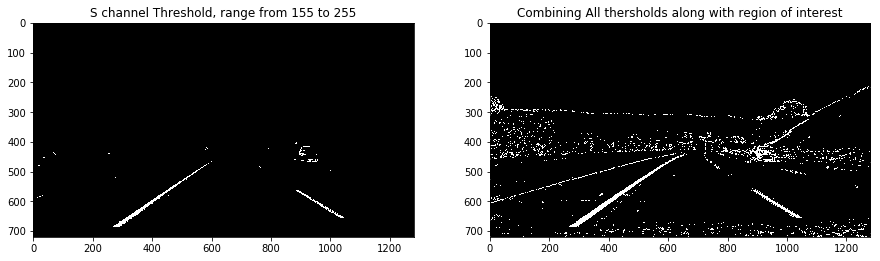

In [200]:
subplot_121_122(THRESH_HLS_S,"S channel Threshold, range from 155 to 255",COMBINED,"Combining All thersholds along with region of interest",)
#plt.savefig("output_images/S_Threshold_and_combining_all_test_image_3_with_region_of_interest.jpg",bbox="tight")

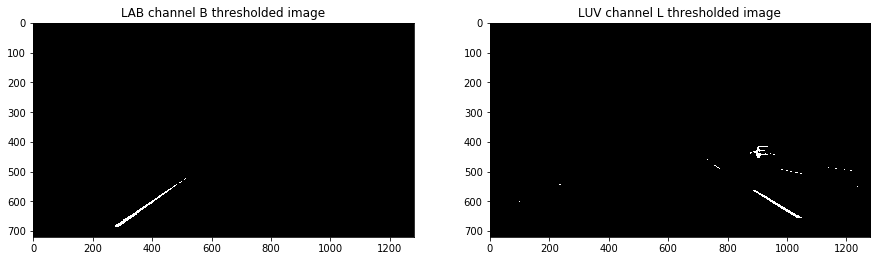

In [203]:
subplot_121_122(THRESH_LAB_B,'LAB channel B thresholded image',THRESH_LUV_L,'LUV channel L thresholded image')

# So far, it is evident that just using a color threshold for the S channel after converting the image into HLS color space gives a good result for the binary image that can be used for further analysis.

# Next we do Perspective transform.

In [254]:
def perspective_transform(i):
    i_size = (i.shape[1],i.shape[0])
    src = np.float32([[490, 482],[810, 482],
                      [1250, 720],[40, 720]])
    dst = np.float32([[0, 0], [1280, 0], 
                     [1250, 720],[40, 720]])
    #src = np.float32([[565,470], #550->525
    #                  [715,470], #760->785
    #                  [1040,680],
    #                  [260,680]])
    # Uncomment to see where the src points lie on the image
    #plt.imshow(i, cmap="gray")
    #plt.plot(550,470,'.')
    #plt.plot(760,470,'.')
    #plt.plot(1150,680,'.')
    #plt.plot(200,680,'.')
    #dst = np.float32([[200,0],
    #                [1000,0],
    #                [1000,685],
    #                [200,685]])
    # Uncomment to see where the source points lie on the image
    #plt.plot(200,50,'*')
    #plt.plot(1000,50,'*')
    #plt.plot(1000,680,'*')
    #plt.plot(200,680,'*')
    #src = np.float32(
    #                [[(i_size[0] / 2) - 55, i_size[1] / 2 + 100],
    #                [((i_size[0] / 6) - 10), i_size[1]],
    #                [(i_size[0] * 5 / 6) + 60, i_size[1]],
    #                [(i_size[0] / 2 + 55), i_size[1] / 2 + 100]])
    #dst = np.float32(
    #                [[(i_size[0] / 4), 0],
    #                [(i_size[0] / 4), i_size[1]],
    #                [(i_size[0] * 3 / 4), i_size[1]],
    #                [(i_size[0] * 3 / 4), 0]])
    M = cv2.getPerspectiveTransform(src,dst)
    M_inv = cv2.getPerspectiveTransform(dst,src)
    warped = cv2.warpPerspective(i, M, i_size, flags=cv2.INTER_LINEAR)
    return M , M_inv,warped

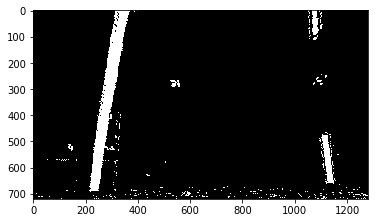

In [255]:
M, M_inv, w = perspective_transform(COMBINED)#(THRESH_HLS_S)
plt.imshow(w, cmap="gray") # Show the warped image
#plt.savefig("output_images/Perspective_Transform_Combined_All_test_image_3.jpg",bbox="tight")

# Verifying Perspective Transform

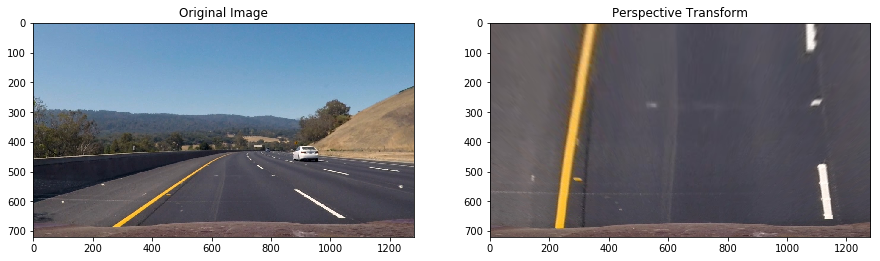

In [256]:
test_image_3_warped = cv2.warpPerspective(test_image3,M,(test_image3.shape[1],test_image3.shape[0])
                                                        ,flags=cv2.INTER_LINEAR)
subplot_121_122(test_image3,"Original Image",test_image_3_warped,"Perspective Transform")
#plt.savefig("output_images/Verifying_Perspective_Transform.jpg",bbox="tight")

# Histogram: Finding the base location of the lane lines in the image

In [257]:
def hist(i):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    i_shape = i.shape
    bottom_half = i[i_shape[0]//2:,:] # sliced image into half (slicing operator)
    # Sum across image pixels vertically - make sure to set `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half,axis=0)
    # return histogram
    return histogram

# Sliding windows: To find the pixels that form the lane lines

In [258]:
# finding lane line pixels
def find_lane_line_pixels(i):    
    h = hist(i)
    out_img = np.dstack((i,i,i))*255
    midpoint = np.int(h.shape[0]//2)
    leftx_base = np.argmax(h[:midpoint])
    rightx_base = np.argmax(h[midpoint:]) + midpoint
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(i.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero (i.e. activated) pixels in the image
    nonzero = i.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # empty list to store the data of previous windows in case there are no good pixels in the window
    prev_good_left_inds = []
    prev_good_right_inds = []
    
    for window in range(nwindows):
        # Identify window boundaries y coordinate
        win_y_low = i.shape[0] - (window+1)*window_height # the upper horizontal line of the window
        win_y_high = i.shape[0] - (window)*window_height # the lower horizontal line of the window 
        # Identify window boundaries x coordinate
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this    
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2)
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2)    
        # Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        #print(window,len(good_right_inds))
        # if there are no good pixels in the window, use the previous ones.
        if(len(good_left_inds)==0):
            good_left_inds = prev_good_left_inds
        if(len(good_right_inds)==0):
            good_right_inds = prev_good_right_inds
            
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        #np.append(left_lane_inds,good_left_inds)
        #np.append(right_lane_inds,good_right_inds)
        #print(left_lane_inds)
        # If you found > minpix pixels, recenter next window ###
        # (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
        # Concatenate the arrays of indices (previously was a list of lists of pixels)
        prev_good_left_inds = good_left_inds
        prev_good_right_inds = good_right_inds
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
    # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    return leftx, lefty, rightx, righty, out_img


In [259]:
leftx, lefty, rightx, righty, out_img = find_lane_line_pixels(w)

In [260]:
def fit_poly(img_shape, leftx, lefty, rightx, righty):
     ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    return left_fit, right_fit, left_fitx, right_fitx, ploty

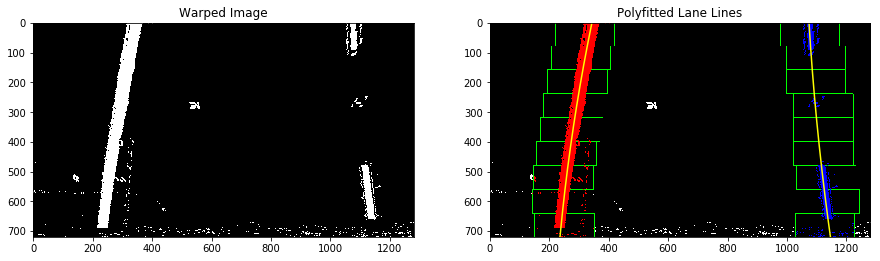

In [261]:
left_fit, right_fit, left_fitx, right_fitx, ploty = fit_poly(w.shape,leftx,lefty,rightx,righty) # fitting a polynomial through the pixels
## setting colors for visualization
out_img[lefty, leftx] = [255,0,0] # left lane pixels denoted with RED color
out_img[righty, rightx] = [0,0,255] # right lane pixels denoted with BLUE color
subplot_121_122(w,"Warped Image",out_img,"Polyfitted Lane Lines")
plt.plot(left_fitx,ploty,color="yellow")
plt.plot(right_fitx,ploty,color="yellow")
#plt.savefig("output_images/Polyfitted_Lane_Lines_test_image_3.jpg",bbox="tight")

In [262]:
def search_around_poly(binary_warped, left_fit, right_fit):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy +
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) +
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy +
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) +
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    A , B,left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)

    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin,
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin,
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

    # Plot the polynomial lines onto the image
    #plt.imshow(result)
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##

    return result, A, B

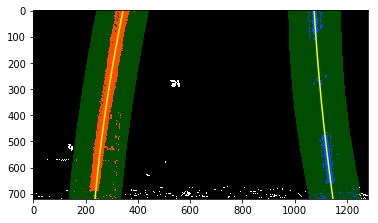

In [263]:
result, A, B = search_around_poly(w,left_fit,right_fit)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
#plt.savefig("output_images/Lane_Lines_Window_test_image_3.jpg",bbox="tight")

# Radius of Curvature: Pixel Radius

In [264]:
def measure_curvature_pixels(left_fit, right_fit,w):
    y_eval = w.shape[0] # y_eval is the y value at the bottom of the image
    left_curverad = (1 + (2*left_fit[0]*y_eval+left_fit[1])**2)**(3/2)/(2*left_fit[0]) # left line calculation
    right_curverad = (1 + (2*right_fit[0]*y_eval+right_fit[1])**2)**(3/2)/(2*right_fit[0]) # right line calculation
    return left_curverad, right_curverad

In [265]:
lr_pix, rr_pix = measure_curvature_pixels(left_fit, right_fit, w)
print(lr_pix,rr_pix)

6498.69165745 9362.48566527


# Radius of Curvature: Real Radius

In [266]:
def measure_curvature_real(leftx, rightx, lefty, righty, w):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = w.shape[0]#np.max(ploty)
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix,2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix,2)
    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) \
    / np.absolute(2*left_fit_cr[0])  # left line 
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) \
    / np.absolute(2*right_fit_cr[0])# right line 
    
    return left_curverad, right_curverad

In [267]:
lr_real, rr_real = measure_curvature_real(leftx, rightx, lefty, righty, w)
print(lr_real,rr_real)

2107.71558415 2988.73647745


# Determine the vehicle position

In [268]:
def vehicle_position(w, left_fit,right_fit):
    y_bottom = w.shape[0]    
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension    
    left_bottom = left_fit[0]*y_bottom*y_bottom + left_fit[1]*y_bottom + left_fit[2]
    right_bottom = right_fit[0]*y_bottom*y_bottom + right_fit[1]*y_bottom + right_fit[2]
    lane_center_bottom_in_pixels = np.average([left_bottom,right_bottom])
    lane_center_bottom_in_meters = ((w.shape[1]/2) - lane_center_bottom_in_pixels)*xm_per_pix
    car_position = dict()
    if(lane_center_bottom_in_meters<0):
        car_position['left'] = lane_center_bottom_in_meters
    elif (lane_center_bottom_in_meters==0):
        car_position['center'] = lane_center_bottom_in_meters
    else:
        car_position['right'] = lane_center_bottom_in_meters
    return lane_center_bottom_in_meters

In [269]:
lane_center_in_meters = vehicle_position(w,left_fit,right_fit)

# Displaying back on the image

In [270]:
def display_on_image(w,left_fit,right_fit,M_inv,lr_real,rr_real,lane_center_bottom_real, undist):
    y_values = np.linspace(0, w.shape[0]-1, w.shape[0] )
    left_line = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_line = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Create an image to draw the lines on
    w_zero = np.zeros_like(w).astype(np.uint8)
    color_w = np.dstack((w_zero, w_zero, w_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_line, y_values]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_line, y_values])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_w, np.int_([pts]), (128,0, 0)) # dark red rgb values (128,0,0)
    #plt.imshow(color_w)
    #Minv = np.linalg.inv(M)
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    warp_to_original = cv2.warpPerspective(color_w, M_inv, (undist.shape[1], undist.shape[0])) 
    #plt.imshow(newwarp)
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, warp_to_original, 0.3, 0)
    return result

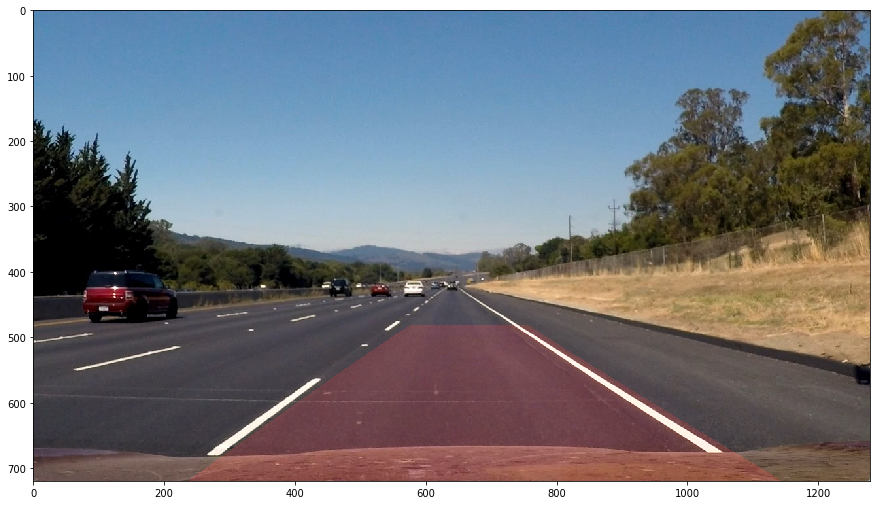

In [271]:
asd = display_on_image(w,left_fit,right_fit,M_inv,lr_real,rr_real,lane_center_in_meters,str8_lines_2)
plt.figure(figsize=(15,15))
plt.imshow(asd)

In [272]:
def is_it_really_a_lane(left_fit, right_fit):
    if len(left_fit) ==0 or len(right_fit) == 0: # if both or any of the left and the right lanes are detected.
        found = False
    else:
        ploty = np.linspace(0, 20, num=10 )      
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        dist_bw_lines = np.mean(right_fitx - left_fitx) # distance between lines detected
        if dist_bw_lines >= 150 and dist_bw_lines <=430: 
            found = True                                # appropriate distance between the detected lines
        else:
            found = False                               # not appropriate distance between the detected lines
        
        slope_l = 2*left_fit[0]*360+left_fit[1]       # check slope at the middle of the lane to check if parallel
        slope_r = 2*right_fit[0]*360+right_fit[1]
        difference_in_slope =  np.abs(slope_l-slope_r)
        
        if difference_in_slope <= 0.15: # if the difference in slope is less than 0.1, the lines are more or less parallel
            found = True
        else:
            found = False
    return found

In [273]:
class Line():
    def __init__(self):
        self.detected = False    # was the line detected in the last iteration?
        self.recent_xfitted = [] # x values of the last n fits of the line
        self.bestx = None        # average x values of the fitted line over the last n iterations
        self.best_fit = None     # polynomial coefficients averaged over the last n iterations
        self.current_fit = [np.array([False])]  # polynomial coefficients for the most recent fit
        self.radius_of_curvature = None  # radius of curvature of the line in some units
        self.line_base_pos = None  # distance in meters of vehicle center from the line
        self.diffs = np.array([0,0,0], dtype='float')  # difference in fit coefficients between last and new fits
        #self.allx = None         # x values for detected line pixels
        #self.ally = None         # y values for detected line pixels
        self.count = 0
        self.reset_count = 0
        self.prev_left = None
        self.prev_right = None
        self.left_fit = None
        self.right_fit = None

l = Line()

# Pipeline for a single image

In [274]:
def process_image(img):
    undistorted_img = correct_for_distortion(img,mtx,dist) # Undistort
    THRESH_ABS_X, THRESH_ABS_Y, THRESH_MAG,\
    THRESH_DIR, THRESH_HLS_S, THRESH_LAB_B, THRESH_LUV_L, COMBINED = get_thresholded_image(undistorted_img) # Apply Threshold
    M, M_inv, w = perspective_transform(COMBINED)#(THRESH_HLS_S) # get the warped image
    
    leftx, lefty, rightx, righty, out_img = find_lane_line_pixels(w) # find the pixels in the lane lines
    # fitting a polynomial through the pixels
    left_fit, right_fit, left_fitx, right_fitx, ploty = fit_poly(w.shape,leftx,lefty,rightx,righty)
    if l.count == 0:
        l.left_fit = left_fit
        l.right_fit = right_fit
    else:
        result, A, B = search_around_poly(w,left_fit,right_fit)
        l.left_fit = A
        l.right_fit = B
    found_lane = is_it_really_a_lane(l.left_fit, l.right_fit)
    if found_lane == True:
        l.prev_left = l.left_fit
        l.prev_right = l.right_fit
        l.reset_count = 0
    else:
        left_fit, right_fit, left_fitx, right_fitx, ploty = fit_poly(w.shape,leftx,lefty,rightx,righty)    
        if l.count > 4:
            l.left_fit = left_fit
            l.right_fit = right_fit
            l.reset_count = 0
        else:
            l.left_fit = l.prev_left
            l.right_fit = l.prev_right
            l.count += 1 
    # setting colors for visualization
    #out_img[lefty, leftx] = [255,0,0] # left lane pixels denoted with RED color
    #out_img[righty, rightx] = [0,0,255] # right lane pixels denoted with BLUE color
    #subplot_121_122(w,"Warped Image",out_img,"Polyfitted Lane Lines")
    #plt.plot(left_fitx,ploty,color="yellow")
    #plt.plot(right_fitx,ploty,color="yellow")
    #result, A, B = search_around_poly(w,left_fit,right_fit)
    lr_pix, rr_pix = measure_curvature_pixels(left_fit,right_fit,w)
    lr_real, rr_real = measure_curvature_real(leftx,rightx,lefty,righty,w)
    lane_center_in_meters = vehicle_position(w,left_fit,right_fit)
    final_output_img = display_on_image(w,left_fit,right_fit,M_inv,lr_real,rr_real,lane_center_in_meters,img)
    cv2.putText(final_output_img, 'Left Lane Radius: {:.0f} m'.format(lr_real), (800, 50), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 2)
    cv2.putText(final_output_img, 'Right Lane Radius: {:.0f} m'.format(rr_real), (800, 100), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 2)
    cv2.putText(final_output_img, 'Vehicle Position: {:.2f} m'.format(lane_center_in_meters), (800, 150), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 2)
    
    #plt.imshow(final_output_img)
    return final_output_img

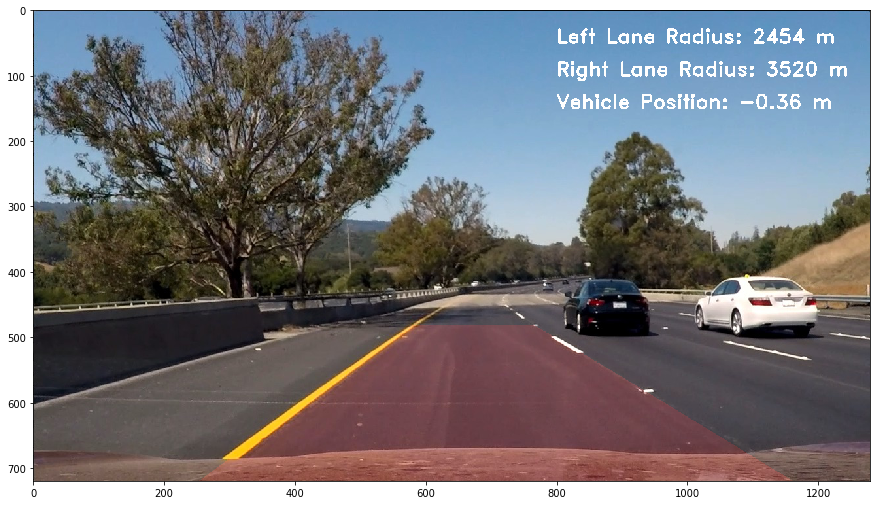

In [275]:
FINAL = process_image(test_image6)
plt.figure(figsize=(15,15))
plt.imshow(FINAL)
#plt.savefig("output_images/Displaying_Final_Result_Straight_Lines_2.jpg",bbox="tight")

# Pipeline for the video

In [276]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [277]:
abcwhite_output = 'output_images/project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(abcwhite_output, audio=False)

[MoviePy] >>>> Building video output_images/project_video_output.mp4
[MoviePy] Writing video output_images/project_video_output.mp4


100%|█████████▉| 1260/1261 [12:02<00:00,  1.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_images/project_video_output.mp4 

CPU times: user 8min 28s, sys: 1min 21s, total: 9min 49s
Wall time: 12min 5s


In [278]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(abcwhite_output))

In [242]:
challenge_output = 'Project_Output/challenge_video_output.mp4'
clip1 = VideoFileClip("challenge_video.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video Project_Output/challenge_video_output.mp4
[MoviePy] Writing video Project_Output/challenge_video_output.mp4


 28%|██▊       | 136/485 [01:06<02:54,  2.00it/s]

IndexError: arrays used as indices must be of integer (or boolean) type

In [243]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))